# importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# load dataset 

In [3]:
df = pd.read_csv('depression.csv')
df.head()


,AGE_RANGE,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED,total_stress_score
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,No,No,No,No,No,No,Yes,No,0,2.039160
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,No,No,No,Yes,No,No,1,5.040851
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,0,2.012962
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,No,Yes,No,No,No,No,No,1,3.024339
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,No,No,No,No,Yes,Yes,No,1,6.014635


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE_RANGE           604 non-null    object 
 1   GENDER              604 non-null    object 
 2   EDU                 604 non-null    object 
 3   PROF                604 non-null    object 
 4   MARSTS              604 non-null    object 
 5   RESDPL              604 non-null    object 
 6   LIVWTH              604 non-null    object 
 7   ENVSAT              604 non-null    object 
 8   POSSAT              604 non-null    object 
 9   FINSTR              604 non-null    object 
 10  DEBT                604 non-null    object 
 11  PHYEX               604 non-null    object 
 12  SMOKE               604 non-null    object 
 13  DRINK               604 non-null    object 
 14  ILLNESS             604 non-null    object 
 15  PREMED              604 non-null    object 
 16  EATDIS  

In [ ]:
# label encoding

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE_RANGE           604 non-null    int64  
 1   GENDER              604 non-null    int64  
 2   EDU                 604 non-null    int64  
 3   PROF                604 non-null    int64  
 4   MARSTS              604 non-null    int64  
 5   RESDPL              604 non-null    int64  
 6   LIVWTH              604 non-null    int64  
 7   ENVSAT              604 non-null    int64  
 8   POSSAT              604 non-null    int64  
 9   FINSTR              604 non-null    int64  
 10  DEBT                604 non-null    int64  
 11  PHYEX               604 non-null    int64  
 12  SMOKE               604 non-null    int64  
 13  DRINK               604 non-null    int64  
 14  ILLNESS             604 non-null    int64  
 15  PREMED              604 non-null    int64  
 16  EATDIS  

# Corelation

In [7]:
corr = df.corr()
corr


,AGE_RANGE,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED,total_stress_score
AGE_RANGE,1.000000,-0.046023,0.028024,-0.464076,-0.442027,-0.143363,0.084953,-0.075533,-0.011266,0.012348,...,0.091486,0.022529,-0.023687,-0.058216,-0.044339,4.356239e-02,0.019085,-0.022319,0.028713,0.081460
GENDER,-0.046023,1.000000,-0.086156,-0.084187,0.215995,0.091059,0.103627,0.022018,0.036461,0.073253,...,-0.030111,-0.033311,0.093248,0.071562,-0.089900,-9.534743e-02,-0.121024,0.032663,-0.049075,-0.131762
EDU,0.028024,-0.086156,1.000000,0.006158,-0.115050,-0.090863,0.056351,-0.044583,-0.006848,-0.008593,...,0.052204,0.047386,-0.019544,-0.011092,-0.003891,1.865547e-02,-0.045227,0.026834,0.012512,0.016581
PROF,-0.464076,-0.084187,0.006158,1.000000,0.253505,0.166032,-0.098564,0.033016,-0.070636,0.052843,...,-0.026836,0.003132,0.075633,0.025283,0.097116,2.345900e-02,-0.021101,-0.023248,-0.008417,0.020469
MARSTS,-0.442027,0.215995,-0.115050,0.253505,1.000000,0.113092,0.038954,0.053751,-0.011904,-0.003769,...,-0.027722,-0.019967,0.068180,0.002037,0.020372,-2.808161e-02,-0.041852,0.001753,0.001188,-0.036433
RESDPL,-0.143363,0.091059,-0.090863,0.166032,0.113092,1.000000,-0.090919,0.045889,0.017663,0.115264,...,-0.082005,0.037072,0.019480,0.006367,0.028207,-9.260315e-02,-0.081549,-0.026873,-0.078001,-0.064731
LIVWTH,0.084953,0.103627,0.056351,-0.098564,0.038954,-0.090919,1.000000,-0.058776,-0.084340,-0.018663,...,0.014535,0.034860,0.010921,0.025476,-0.052081,-4.256283e-02,-0.059173,0.011410,0.014851,-0.038378
ENVSAT,-0.075533,0.022018,-0.044583,0.033016,0.053751,0.045889,-0.058776,1.000000,0.309643,-0.208054,...,-0.210750,-0.215578,-0.137874,-0.079658,-0.140638,-1.732917e-01,-0.119749,-0.037729,-0.346514,-0.271782
POSSAT,-0.011266,0.036461,-0.006848,-0.070636,-0.011904,0.017663,-0.084340,0.309643,1.000000,-0.222436,...,-0.162729,-0.112340,-0.128381,-0.019834,-0.140300,-1.739707e-01,-0.096712,0.047111,-0.391794,-0.202745
FINSTR,0.012348,0.073253,-0.008593,0.052843,-0.003769,0.115264,-0.018663,-0.208054,-0.222436,1.000000,...,0.127303,0.163607,0.148119,0.104690,0.090375,1.141741e-01,0.109470,0.044970,0.295798,0.232545


# positive negative corelation

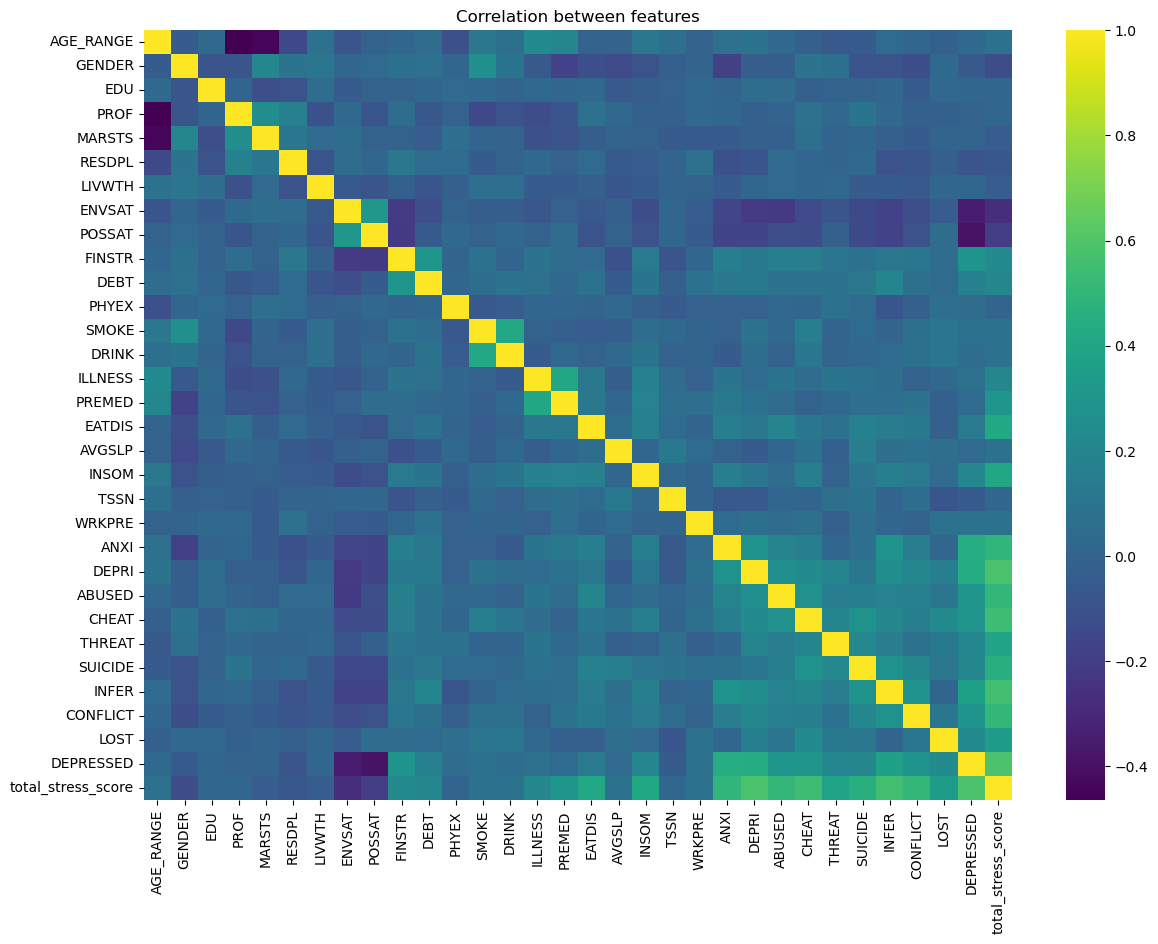

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='viridis')
plt.title("Correlation between features")
plt.show()


# Data Splitting

In [13]:
X = df.drop('DEPRESSED', axis=1)
y = df['DEPRESSED']


print("\n\t  ******************************** ")
print("\t  X shape:", X.shape)
print("\n\t  y shape:", y.shape)
print("\t  ********************************\n ")



	  ******************************** 
	  X shape: (604, 31)

	  y shape: (604,)
	  ********************************
 


# Train, Test Spliting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\n\t************************************** ")
print(" n\t      Size of Train X = " , len(X_train))
print("n\t       Size of Train y = " , len(y_train))
print("n\t       Size of Test X = " , len(X_test))
print("n\t       Size of Test y = " , len(y_test))
print("\t ************************************** ")


	************************************** 
 n	      Size of Train X =  483
n	       Size of Train y =  483
n	       Size of Test X =  121
n	       Size of Test y =  121
	 ************************************** 


# Gaussian Naive Byes Classifier

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

# Prediction on train data

In [29]:
training_data_prediction = gnb.predict(X_train)
print(training_data_prediction)


[1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1
 0 0]


# Accuracy on train data

In [30]:
 from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, training_data_prediction)
print("The Accuracy of Prediction is ", train_accuracy)


The Accuracy of Prediction is  0.8240165631469979


# confusion matrix

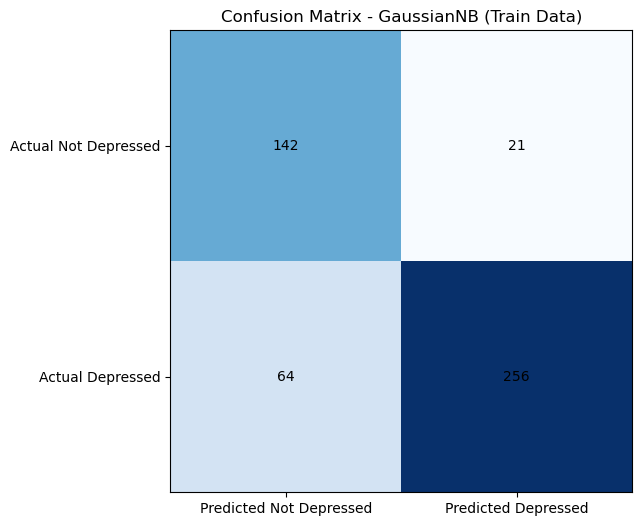

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, training_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Blues')

ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.title("Confusion Matrix - GaussianNB (Train Data)")
plt.show()


In [32]:
report = classification_report(y_train, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.69      0.87      0.77       163
           1       0.92      0.80      0.86       320

    accuracy                           0.82       483
   macro avg       0.81      0.84      0.81       483
weighted avg       0.84      0.82      0.83       483



# Prediction on Testing data

In [33]:
testing_data_prediction = gnb.predict(X_test)
print(testing_data_prediction)


[0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 1]


In [34]:
# Accuracy
test_accuracy = accuracy_score(y_test, testing_data_prediction)
print("The Accuracy of Prediction is ", test_accuracy)


The Accuracy of Prediction is  0.8181818181818182


# confusion matrix 

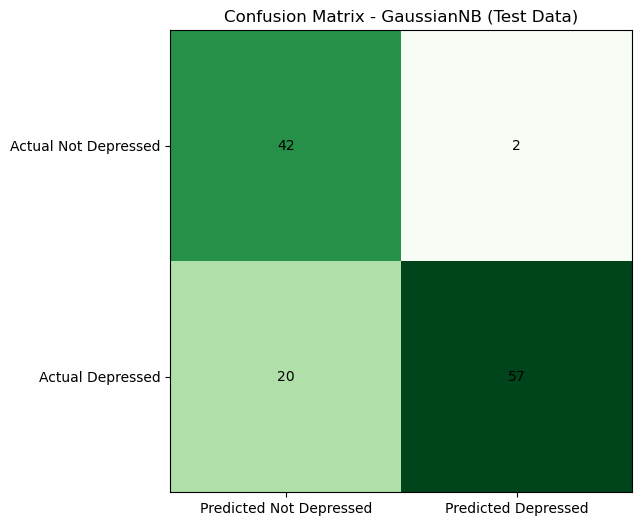

In [35]:
cm = confusion_matrix(y_test, testing_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Greens')

ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.title("Confusion Matrix - GaussianNB (Test Data)")
plt.show()


In [36]:
# classification report

report = classification_report(y_test, testing_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.68      0.95      0.79        44
           1       0.97      0.74      0.84        77

    accuracy                           0.82       121
   macro avg       0.82      0.85      0.82       121
weighted avg       0.86      0.82      0.82       121



# Logistic Regression Classifier

In [49]:
khadija = LogisticRegression(max_iter=1000)

# Fit the model using training data
khadija.fit(X_train, y_train)

LogisticRegression()



LogisticRegression()

# Prediction on Train Data

In [50]:
 training_data_prediction = khadija.predict(X_train)
print(training_data_prediction)


[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0]


In [51]:
# Accuracy on Train Data
train_acc = accuracy_score(y_train,  training_data_prediction)
print("The Accuracy of Prediction (Train) is ", train_acc)


The Accuracy of Prediction (Train) is  0.8964803312629399


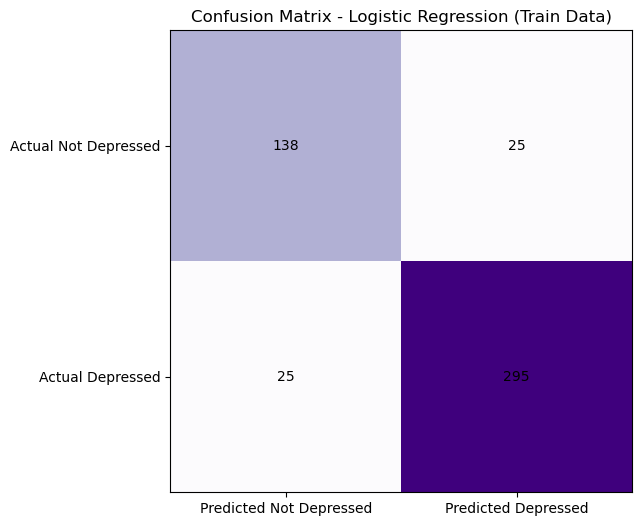

In [56]:
 from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, training_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Purples')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - Logistic Regression (Train Data)")
plt.show()


In [67]:
# Classification Report (Train)
report = classification_report(y_train, training_data_prediction)
print(report)



              precision    recall  f1-score   support

           0       0.85      0.85      0.85       163
           1       0.92      0.92      0.92       320

    accuracy                           0.90       483
   macro avg       0.88      0.88      0.88       483
weighted avg       0.90      0.90      0.90       483



# Prediction on Test Data

In [68]:
 testing_data_prediction = khadija.predict(X_test)
print(testing_data_prediction)


[0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1]


In [70]:
# Accuracy on Test Data
test_accuracy = accuracy_score(y_test, testing_data_prediction)
print("The Accuracy of Prediction is ", test_accuracy)


The Accuracy of Prediction is  0.9008264462809917


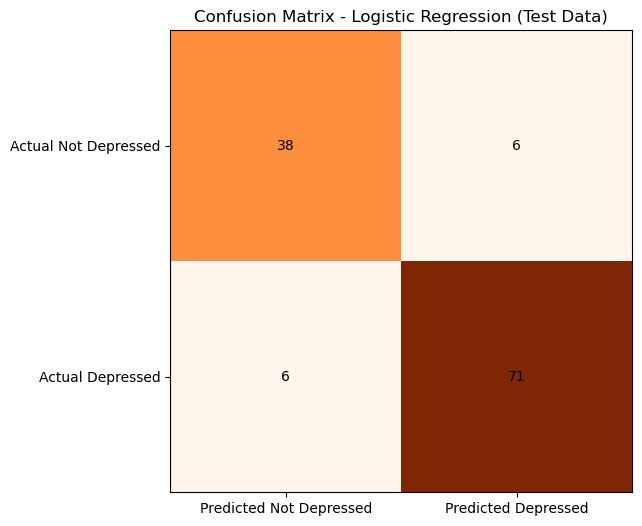

In [71]:
# Confusion Matrix (Test)
cm = confusion_matrix(y_test, testing_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Oranges')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - Logistic Regression (Test Data)")
plt.show()


In [73]:
 # Classification Report (Test)
report = classification_report(y_test, testing_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.92      0.92      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.89      0.89       121
weighted avg       0.90      0.90      0.90       121



# SVM Classifier

In [39]:
 khadija = SVC(kernel='rbf')
khadija.fit(X_train, y_train)
SVC()


SVC()

# Prediction on Train Data

In [74]:
training_data_prediction = khadija.predict(X_train)
print(training_data_prediction)


[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0]


In [75]:
# Accuracy on Train Data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, training_data_prediction)
print("The Accuracy of Prediction is ", train_accuracy)


The Accuracy of Prediction is  0.8964803312629399


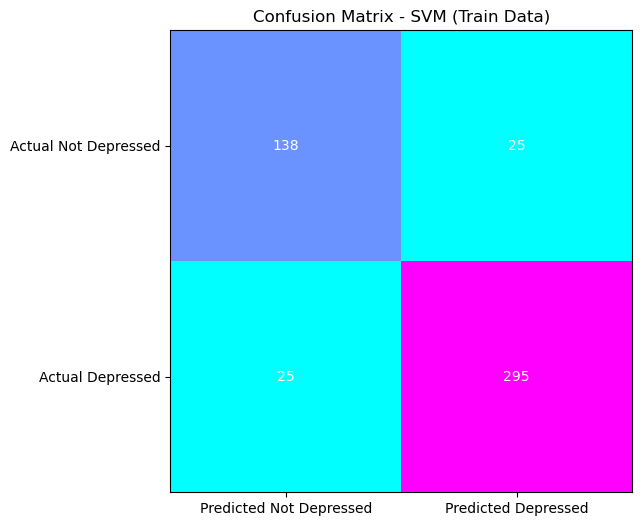

In [76]:
# Confusion Matrix (Train)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, training_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='cool')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='white')

plt.title("Confusion Matrix - SVM (Train Data)")
plt.show()


In [77]:
# Classification Report (Train)
report = classification_report(y_train, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       163
           1       0.92      0.92      0.92       320

    accuracy                           0.90       483
   macro avg       0.88      0.88      0.88       483
weighted avg       0.90      0.90      0.90       483



# Prediction on Test Data

In [78]:
testing_data_prediction = khadija.predict(X_test)
print(testing_data_prediction)


[0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1]


In [79]:
# Accuracy on Test Data
test_accuracy = accuracy_score(y_test, testing_data_prediction)
print("The Accuracy of Prediction is ", test_accuracy)


The Accuracy of Prediction is  0.9008264462809917


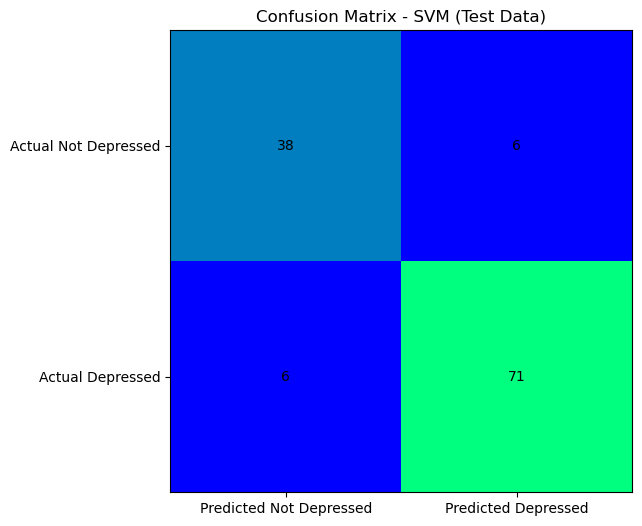

In [80]:
# Confusion Matrix (Test)
cm = confusion_matrix(y_test, testing_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='winter')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - SVM (Test Data)")
plt.show()


In [81]:
# Classification Report (Test)
report = classification_report(y_test, testing_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.92      0.92      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.89      0.89       121
weighted avg       0.90      0.90      0.90       121



# Decision Tree Classifier

In [40]:
khadija = DecisionTreeClassifier(random_state=42)

khadija.fit(X_train, y_train)

DecisionTreeClassifier()


 

DecisionTreeClassifier()

# Prediction on Train Data

In [41]:
training_data_prediction = khadija.predict(X_train)
print(training_data_prediction)


[1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0]


In [82]:
# Accuracy on Train Data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, training_data_prediction)
print("The Accuracy of Prediction is ", train_accuracy)


The Accuracy of Prediction is  0.8964803312629399


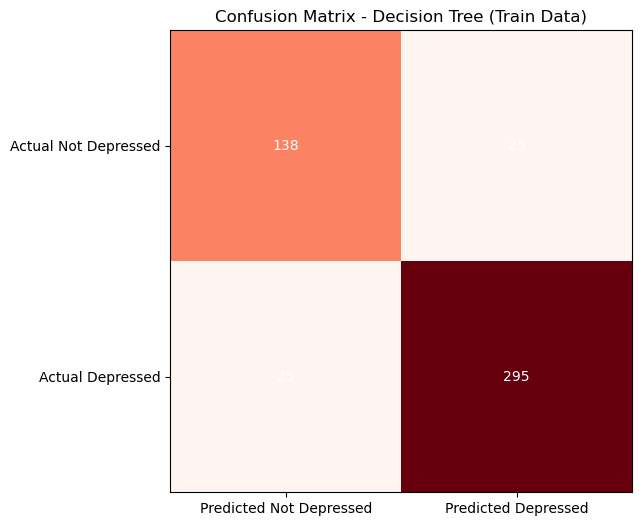

In [83]:
# Confusion Matrix (Train)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, training_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Reds')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='white')

plt.title("Confusion Matrix - Decision Tree (Train Data)")
plt.show()


In [84]:
# Classification Report (Train)
report = classification_report(y_train, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       163
           1       0.92      0.92      0.92       320

    accuracy                           0.90       483
   macro avg       0.88      0.88      0.88       483
weighted avg       0.90      0.90      0.90       483



# Prediction on Test Data

In [85]:
testing_data_prediction = khadija.predict(X_test)
print(testing_data_prediction)


[0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1]


In [86]:
# Accuracy on Test Data
test_accuracy = accuracy_score(y_test, testing_data_prediction)
print("The Accuracy of Prediction is ", test_accuracy)


The Accuracy of Prediction is  0.9008264462809917


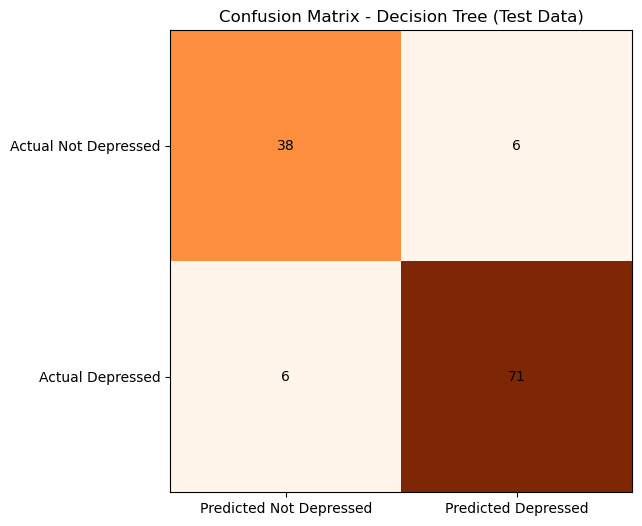

In [100]:
# Confusion Matrix (Test)
cm = confusion_matrix(y_test, testing_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Oranges')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - Decision Tree (Test Data)")
plt.show()


In [ ]:
# Classification Report (Test)
report = classification_report(y_test, testing_data_prediction)
print(report)


#  Random Forest Classifier

In [101]:
 khadija = RandomForestClassifier(n_estimators=100, random_state=42)

khadija.fit(X_train, y_train)

RandomForestClassifier()


RandomForestClassifier()

# Prediction on Train Data

In [93]:
training_data_prediction = khadija.predict(X_train)
print(training_data_prediction)


[1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0]


In [94]:
# Accuracy on Train Data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, training_data_prediction)
print("The Accuracy of Prediction is ", train_accuracy)


The Accuracy of Prediction is  1.0


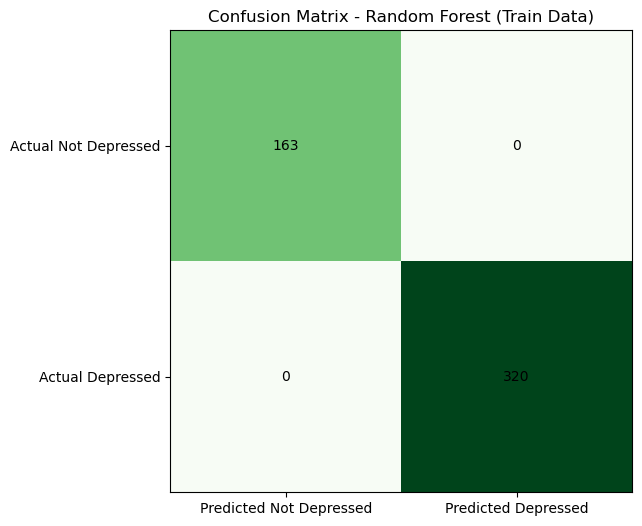

In [95]:
 # Confusion Matrix (Train)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, training_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='Greens')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - Random Forest (Train Data)")
plt.show()


In [102]:
# Classification Report (Train)
report = classification_report(y_train, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       320

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



# Prediction on Test Data

In [103]:
testing_data_prediction = khadija.predict(X_test)
print(testing_data_prediction)


[0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1]


In [104]:
# Accuracy on Test Data
test_accuracy = accuracy_score(y_test, testing_data_prediction)
print("The Accuracy of Prediction is ", test_accuracy)


The Accuracy of Prediction is  0.8760330578512396


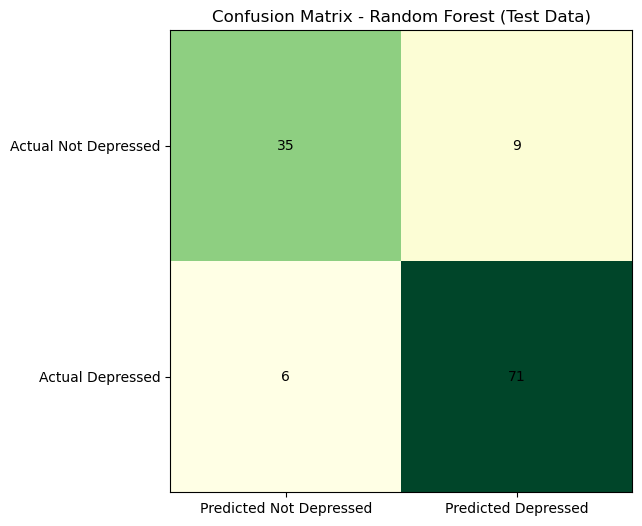

In [105]:
# Confusion Matrix (Test)
cm = confusion_matrix(y_test, testing_data_prediction)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap='YlGn')

ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predicted Not Depressed', 'Predicted Depressed'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual Not Depressed', 'Actual Depressed'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black')

plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()


In [106]:
# Classification Report (Test)
report = classification_report(y_test, testing_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.89      0.92      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.86      0.86       121
weighted avg       0.88      0.88      0.88       121



# Hyperparmater tuning using GridSearchCV

In [107]:
 # Hyperparameter grid
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(3, 20, 2),
    'criterion': ["entropy", "gini"]
}

In [117]:
 # Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=5)

# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,  cv=5, verbose=True)
grid_search.fit(X_train, y_train)

# Best score and estimator
print("\n\t Best CV Accuracy:", grid_search.best_score_)
print("\n\t Best Estimator:", grid_search.best_estimator_)

 



Fitting 5 folds for each of 1620 candidates, totalling 8100 fits

	 Best CV Accuracy: 0.8467139175257732

	 Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=19,
                       min_samples_split=3, random_state=5)


# Prediction on Train Data

In [109]:
train_pred_grid = grid_search.predict(X_train)
print("Prediction on Train Data (Khadija):")
print(train_pred_grid)



Prediction on Train Data (Khadija):
[1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0

In [110]:
# Accuracy on Train Data
train_acc = accuracy_score(y_train, train_pred_grid)
print("The Accuracy of Prediction (Train) is ", train_acc)




The Accuracy of Prediction (Train) is  0.8695652173913043


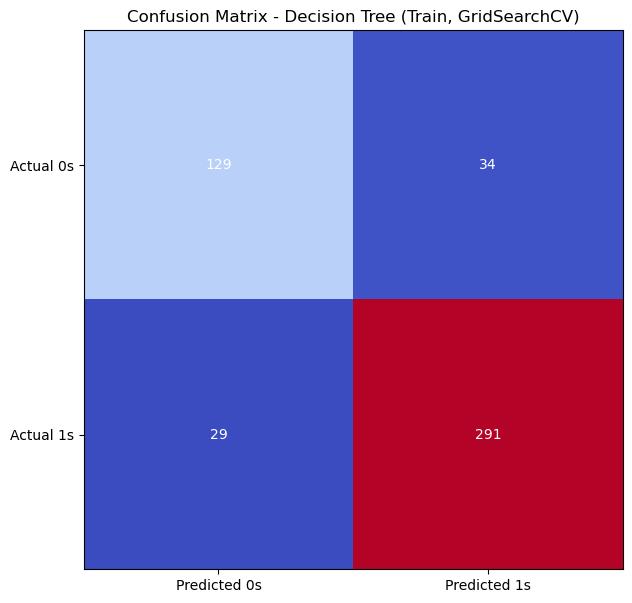

In [111]:
# Confusion Matrix (Train)
cm_train = confusion_matrix(y_train, train_pred_grid)
fig, ax = plt.subplots(figsize=(7,7))

ax.imshow(cm_train, cmap="coolwarm")    

ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s')) 

for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(j, i, cm_train[i, j], ha='center', va='center', color='white')
        
plt.title("Confusion Matrix - Decision Tree (Train, GridSearchCV)")
plt.show()


In [112]:
# Classification Report (Train)
print("Classification Report (Train):")
print(classification_report(y_train, train_pred_grid))


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       163
           1       0.90      0.91      0.90       320

    accuracy                           0.87       483
   macro avg       0.86      0.85      0.85       483
weighted avg       0.87      0.87      0.87       483



# Prediction on Test Data

In [113]:
test_pred_grid = grid_search.predict(X_test)
print("Prediction on Test Data (Khadija):")
print(test_pred_grid)


Prediction on Test Data (Khadija):
[0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1]


In [114]:
# Accuracy on Test Data
test_acc = accuracy_score(y_test, test_pred_grid)
print("The Accuracy of Prediction (Test) is ", test_acc)

The Accuracy of Prediction (Test) is  0.8760330578512396


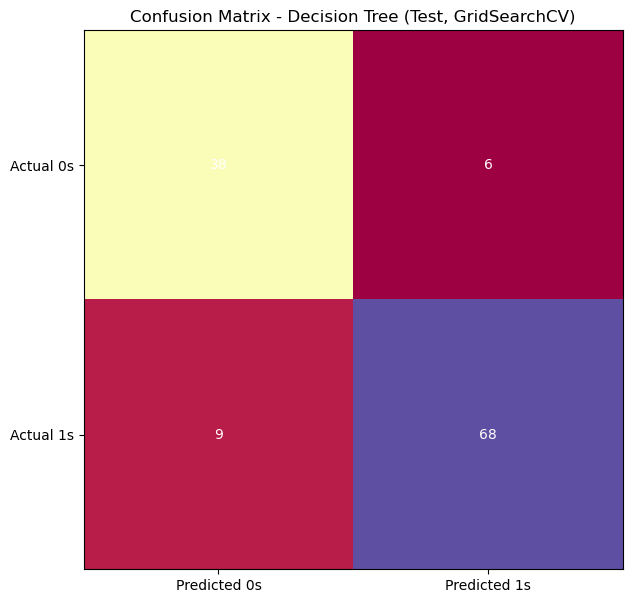

In [115]:
# Confusion Matrix (Test)
cm_test = confusion_matrix(y_test, test_pred_grid)
fig, ax = plt.subplots(figsize=(7,7))

ax.imshow(cm_test, cmap="Spectral")   
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))

for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        ax.text(j, i, cm_test[i, j], ha='center', va='center', color='white')
        
plt.title("Confusion Matrix - Decision Tree (Test, GridSearchCV)")
plt.show()

In [116]:
# Classification Report (Test)
print("Classification Report (Test):")
print(classification_report(y_test, test_pred_grid))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        44
           1       0.92      0.88      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.87      0.87       121
weighted avg       0.88      0.88      0.88       121

